# Assignment 3 - Matplotlib

**Tanvir, Ahmed, 20075186**

#### Brief introduction and objective of the analysis

In this assignment the previously worked on pandas assignment data were used to plot features of interets. 

1. Constructed 2 dataframes using World Bank data.

2. The first DataFrame: 'dataframe_1' describes the Economy of the selected countries.

3. The second DataFrame: 'dataframe_2' describes the Energy consumption of the countries, access to electricity, how electricty is produced (fossil, renewable).

4. The goal was to identify which factors has the most correlation with renewable energy usage or shifts towards it.

Please note: that initially a few extra indicators were chosen to get a feel of the economy and the energy consumption but all of them weren't used in the analysis.

The data analysed was numeric, structured with proper labels.

**Summary**

No correlation was found between strength or size of an economy and the dependency on renewable sources for electricity generation.

France and Canada are utilising green sources the most from my country list and European countries have more inclination towards renewable energy. 

## Data Preparation

In [1]:
# Codes for the chosen countries

country_codes = ["CAN", "CHN", "DEU", "EGY", "FRA", "GBR", "IND", "JPN", "NGA", "USA", "ZAF"]

In [2]:
# Creating a dictionary in the country code:country name format:

# Step 1: Creating a list of country names in the same order as the country_codes list

country_proper_names = ['Canada', 'China', 'Germany', 'Egypt', 'France', 'United Kingdom', 'India', 'Japan', 'Nigeria', 
                        'United States', 'South Africa']

country_names = {}
for i in range(0,len(country_codes)):
    country_names[country_codes[i]] = country_proper_names[i]


In [3]:
# Grouping the countries in their respective continents in a dictionary

country_groups = {'EGY':'Africa', 'NGA':'Africa', 'ZAF':'Africa', 'CHN':'Asia', 'IND':'Asia', 'JPN':'Asia', 
                  'FRA':'Europe', 'DEU':'Europe', 'GBR':'Europe', 'CAN':'North America', 'USA': 'North America'}

### Indicators

In [4]:
import numpy as np
import pandas as pd
import wbgapi as wb
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Creating a list of Indicator IDs for my first DataFrame

indicator_ids_1 = ['SP.POP.TOTL', 'SL.TLF.TOTL.IN', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'GC.DOD.TOTL.GD.ZS', 
                   'FI.RES.TOTL.CD', 'BX.GSR.GNFS.CD', 'BM.GSR.GNFS.CD']

# Indicator IDs (indicator_ids_2) for my second DataFrame is done in a similar method

### DataFrames

In [6]:
# Creating a Pandas DataFrame from World Bank data

my_dataframe_1 = wb.data.DataFrame(indicator_ids_1, country_codes, time=range(2011, 2016)) 

#replacing most recent 5 years mrv=5 with time for chosen years

df = my_dataframe_1.unstack().stack(level=0) # using unstack and stack method to get the dataframe to my desired shape

# unstack() takes the indicators from being subcategories in the rows under country names to subcategories of year columns

# applying stack() again on level = 0 takes the year columns to a sublevel of rows


In [7]:
# Multiindexing the rows

dataframe_1 = df.iloc[:, ::-1]

index = pd.MultiIndex.from_product([country_codes, [2011, 2012, 2013, 2014, 2015]],
                                   names=['Country', 'Year'])

dataframe_1.index = index

In [8]:
# Multiindexing the columns
dataframe_1.columns = pd.MultiIndex.from_tuples([('Population', 'Total'), ('Population', 'Total labor force'), 
                                                 ('GDP','Growth (annual %)'), ('GDP', 'Gross (USD)'),
                                                 ('Economic strength', 'Central government debt (% of GDP)'), 
                                                 ('Economic strength', 'Total reserves (USD)'), 
                                                 ('Commerce', 'Exports (USD)'), ('Commerce', 'Imports (USD)')])

In [9]:
# Re-arranging the columns using a variable called 't'
t = list(dataframe_1.columns)     # creates a list of column names 

# I want to swap positions of column 3 and 4 
t[2], t[3] = t[3], t[2]

dataframe_1 = dataframe_1[t]

In [10]:
# Creating the second DataFrame following the same steps as above

indicator_ids_2 = ['SP.POP.TOTL', 'EG.ELC.ACCS.ZS', 'EG.USE.ELEC.KH.PC', 'EG.ELC.LOSS.ZS', 
                   'EG.ELC.FOSL.ZS', 'EG.ELC.RNWX.ZS', 'EG.ELC.HYRO.ZS', 'EG.ELC.NUCL.ZS']

my_dataframe_2 = wb.data.DataFrame(indicator_ids_2, country_codes, time=range(2011, 2016))

df2 = my_dataframe_2.unstack().stack(level=0) # using unstack and stack method to get the dataframe to my desired shape

dataframe_2 = df2.iloc[:, ::-1]

index_2 = pd.MultiIndex.from_product([country_codes, [2011, 2012, 2013, 2014, 2015]],
                                   names=['Country', 'Year'])

dataframe_2.index = index_2

# How the dataframe looks like
dataframe_2.head(10)

series         SP.POP.TOTL  EG.USE.ELEC.KH.PC  EG.ELC.RNWX.ZS  EG.ELC.NUCL.ZS  \
Country Year                                                                    
CAN     2011  3.433933e+07       15644.540278        3.298016       14.707805   
        2012  3.471422e+07       15336.624857        3.507259       14.900157   
        2013  3.508295e+07       15750.811633        4.409954       15.549008   
        2014  3.543744e+07       15588.487146        5.570376       16.119075   
        2015  3.570291e+07                NaN        6.267257       15.546561   
CHN     2011  1.345035e+09        3295.784868        2.137640        1.835336   
        2012  1.354190e+09        3466.019539        2.657515        1.953846   
        2013  1.363240e+09        3757.185088        3.564878        2.053005   
        2014  1.371860e+09        3905.317598        4.056660        2.339286   
        2015  1.379860e+09                NaN        4.857004             NaN   

series        EG.ELC.LOSS.ZS  EG.ELC.HYRO.ZS  EG.ELC.FOSL.ZS  EG.ELC.ACCS.ZS  
Country Year                                                                  
CAN     2011        8.800576       59.040234       22.543932      100.000000  
        2012        8.438532       59.723302       21.424611      100.000000  
        2013        8.466956       58.888079       20.769341      100.000000  
        2014        8.711767       57.254617       20.763125      100.000000  
        2015             NaN       56.744193       21.067180      100.000000  
CHN     2011        5.740233       14.624130       81.174003       99.848724  
        2012        5.810062       17.308734       77.859893       99.961929  
        2013        5.777010       16.731349       77.424467       99.996445  
        2014        5.471266       18.552494       74.822887      100.000000  
        2015             NaN       19.069813       72.962076      100.000000

In [11]:
# Multiindexing the columns again

dataframe_2.columns = pd.MultiIndex.from_tuples([('Population', 'Total'), 
                                                 ('Electricity T&D', 'Electricity consumption (kWh/capita)'), 
                                                 ('Electricity production source (% of total)','Solar & Wind'), 
                                                 ('Electricity production source (% of total)','Nuclear'),
                                                 ('Electricity T&D', 'Trans & Dist loss (% of output)'), 
                                                 ('Electricity production source (% of total)','Hydro'), 
                                                 ('Electricity production source (% of total)','Fossil fuels'), 
                                                 ('Population', 'Access to electricity (% of population)')])

dataframe_2 = dataframe_2[[('Population', 'Total'),
                           ('Population', 'Access to electricity (% of population)'),
                            ('Electricity T&D', 'Electricity consumption (kWh/capita)'),
                            ('Electricity T&D', 'Trans & Dist loss (% of output)'),
                            ('Electricity production source (% of total)','Solar & Wind'), 
                            ('Electricity production source (% of total)','Nuclear'),
                            ('Electricity production source (% of total)','Hydro'),
                            ('Electricity production source (% of total)','Fossil fuels')]]

In [12]:
# Application of groupby

gdp_mean = dataframe_1.groupby(level='Country')[[('GDP', 'Gross (USD)')]].mean()
gdp_mean.sort_values(by=[('GDP', 'Gross (USD)')], ascending=False)

gdp_max = dataframe_1.groupby(level='Country')[[('GDP', 'Gross (USD)')]].max()
gdp_max

,GDP
,Gross (USD)
Country,
CAN,1.846597e+12
CHN,1.106155e+13
DEU,3.889093e+12
EGY,3.293666e+11
FRA,2.865158e+12
GBR,3.087166e+12
IND,2.103588e+12
JPN,6.272363e+12


In [13]:
reserves_max = dataframe_1.groupby(level='Country')[[('Economic strength', 'Total reserves (USD)')]].max()
reserves_max

,Economic strength
,Total reserves (USD)
Country,
CAN,7.975352e+10
CHN,3.900039e+12
DEU,2.488565e+11
EGY,1.863754e+10
FRA,1.845218e+11
GBR,1.481093e+11
IND,3.533191e+11
JPN,1.295839e+12


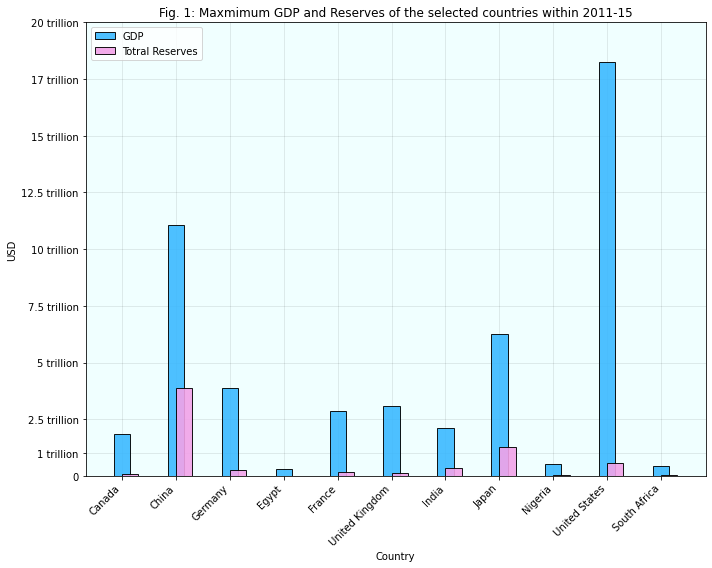

In [14]:
plt.figure(figsize=(10,8))

ax = plt.axes(facecolor='#F0FFFF') # adding this axis to set custom background color 

ax.set_axisbelow(True)    # setting the axis below my primary axis so that the grid and the background is behind  

plt.grid(color='black', linestyle='solid', alpha=0.1)    # Specifying the grid

# Plotting a bar graph of highest GDP within the selected years for chosen countries

plt.bar(country_proper_names, np.array(gdp_max).reshape(11,), alpha=0.9, label='GDP', 
        color='#3BB9FF', edgecolor='black', width=0.3,)

# Plotting a bar graph of highest reserves held within the selected years for chosen countries
plt.bar(country_proper_names, np.array(reserves_max).reshape(11,), alpha=0.9, label='Totral Reserves', 
        color='#F2A2E8', edgecolor='black', align='edge', width=0.3)

plt.xlabel("Country")
plt.ylabel("USD")

plt.title("Fig. 1: Maxmimum GDP and Reserves of the selected countries within 2011-15")

#Customizing the ticks on the X and Y axis

plt.xticks(rotation=45, ha='right') 
plt.yticks([0, 1e12, 0.25e13, 0.5e13, 0.75e13, 1.0e13, 1.25e13, 1.5e13, 1.75e13, 2.0e13], 
           ['0', '1 trillion', '2.5 trillion', '5 trillion', '7.5 trillion', '10 trillion', '12.5 trillion', 
            '15 trillion', '17 trillion', '20 trillion'])

plt.legend(loc=2)
plt.tight_layout()

# Saving the figure as png to add to the dashboard (.pdf file)
plt.savefig('GDP_Reserves.png', dpi=720, bbox_inches='tight')
plt.show()

***USA, China and Japan had higher avearge GDP than the rest of the countries between 2011 and 2015***

In [15]:
growth_plot = dataframe_1[('GDP','Growth (annual %)')]
type(growth_plot)

pandas.core.series.Series

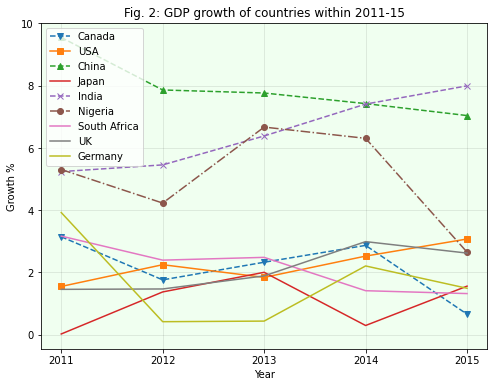

In [16]:
# Line plot for GDP growth

plt.figure(figsize=(8,6))

ax = plt.axes(facecolor='#F0FFF0', alpha=0.9)
ax.set_axisbelow(True)
plt.grid(color='black', linestyle='solid', alpha=0.1)

plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['CAN'], 'v', linestyle='dashed', label='Canada')
plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['USA'], 's', linestyle='solid', label='USA')
plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['CHN'], '^', linestyle='dashed', label='China')
plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['JPN'], label='Japan')
plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['IND'], 'x', linestyle='dashed', label='India')
plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['NGA'], 'o', linestyle='dashdot', label='Nigeria')
plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['ZAF'], label='South Africa')
plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['GBR'], label='UK')
plt.plot(['2011', '2012', '2013', '2014', '2015'], growth_plot['DEU'], label='Germany')


plt.xlabel("Year")
plt.ylabel("Growth %")

plt.title("Fig. 2: GDP growth of countries within 2011-15")

plt.legend(loc=0)
plt.savefig('GDP growth.png', dpi=720, bbox_inches='tight')
plt.show()

In [17]:
df_pop = dataframe_1[[('Population', 'Total'), ('Population', 'Total labor force')]].droplevel(level=0, axis=1)
df_pop = df_pop.reset_index()

df_pop.head()

,Country,Year,Total,Total labor force
0,CAN,2011,34339328.0,19147395.0
1,CAN,2012,34714222.0,19322866.0
2,CAN,2013,35082954.0,19546552.0
3,CAN,2014,35437435.0,19629145.0
4,CAN,2015,35702908.0,19747709.0


In [18]:
population = df_pop.groupby(by='Country', axis=0).max()
population.reset_index()['Total'][0]

35702908.0

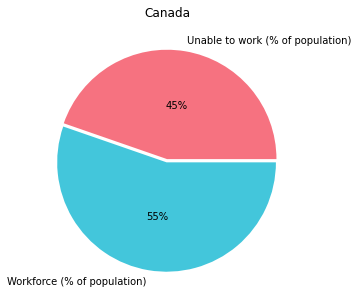

In [19]:
plt.figure(figsize=(5,5))

custom_colors = ['#F67280', '#43C6DB']

plt.pie([population['Total'][0]-population['Total labor force'][0], population['Total labor force'][0]], colors=custom_colors, 
        autopct='%1.0f%%', pctdistance=0.5, 
        labels = ['Unable to work (% of population)', 'Workforce (% of population)'], labeldistance=1.1, 
        explode = (0, 0.03))

plt.title(country_names[population.index[0]])

plt.tight_layout()
plt.show()

In [20]:
# China, Japan, Germany, UK, USA, Canada

In [21]:
# The percentage of the labor force in the countries apply() method

df_3 = dataframe_1[[('Population', 'Total')]].droplevel(level=0, axis=1)
df_3 = df_3.reset_index()

df_4 = dataframe_1[[('Population', 'Total labor force')]].droplevel(level=0, axis=1)
df_4 = df_4.reset_index()

def ratio(x):
    x['Total labor force'] /= df_3['Total']/100
    return x

labor_force_percentage = df_4.groupby('Country').apply(ratio)

labor_force_percentage.columns = ['Country', 'Year', 'labor force percetage']

labor_force_percentage.groupby('Country')['labor force percetage'].mean()

Country
CAN    55.567898
CHN    57.749414
DEU    52.180651
EGY    32.302633
FRA    45.881623
GBR    51.592087
IND    36.040963
JPN    51.508466
NGA    31.700477
USA    50.113420
ZAF    37.488959
Name: labor force percetage, dtype: float64

In [22]:
dct = {'CHN':-10, 'JPN':-4, 'DEU':-9, 'GBR':-6, 'USA':-2, 'CAN':-11}

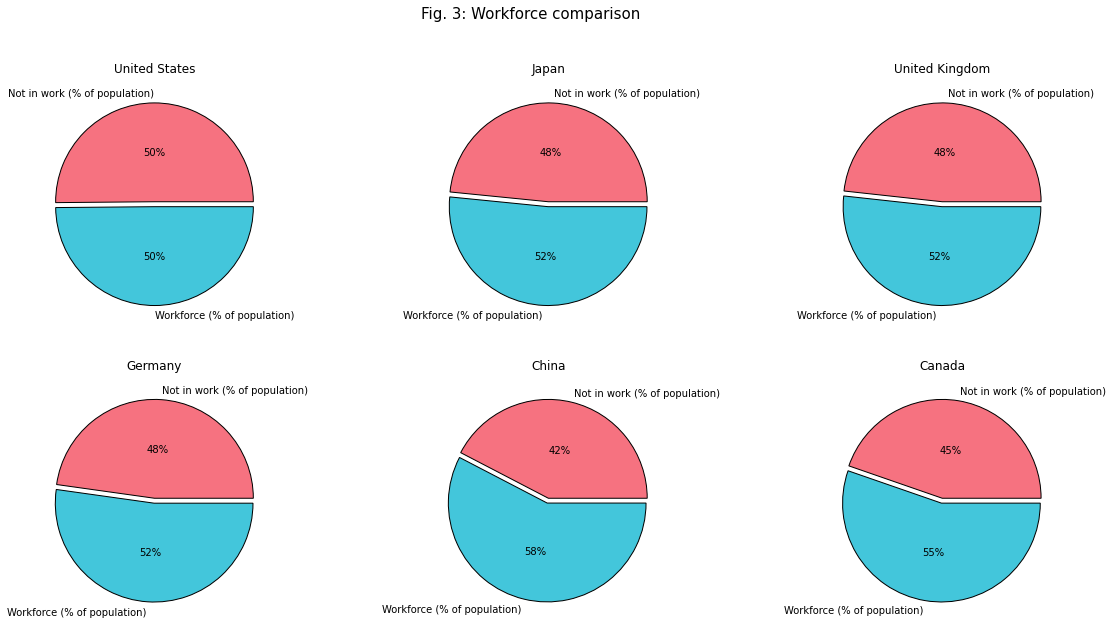

In [23]:
# Creating subplots.

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

plt.grid(color='black', linestyle='solid', alpha=0.1)

fig.suptitle('Fig. 3: Workforce comparison', fontsize=15) #fontweight='bold')

ix=0
list_idx = [-2, -4, -6, -9, -10, -11]
custom_colors = ['#F67280', '#43C6DB']
for i in range(2):
    for j in range(3):
        axes[i, j].pie([population['Total'][list_idx[ix]]-population['Total labor force'][list_idx[ix]], 
                       population['Total labor force'][list_idx[ix]]], 
                       colors=custom_colors, autopct='%1.0f%%', pctdistance=0.5, 
                       labels = ['Not in work (% of population)', 'Workforce (% of population)'], 
                       labeldistance=1.1, explode = (0, 0.05), wedgeprops={'edgecolor':'black'})
        
        axes[i, j].set_title(country_names[population.index[list_idx[ix]]])
        ix += 1
plt.savefig('Workforce.png', dpi=720, bbox_inches='tight')
plt.show()

**China, Canada, Germany, United Kingdom, Japan and the US have more than 50 percent of their population into the workforce**

In [24]:
growth_plot = dataframe_1[('GDP','Growth (annual %)')]
type(growth_plot)

pandas.core.series.Series

**India and USA GDP was growing between 2011-2015. The other countries growth is steady but China has a slight decline in growth percentage**

**Europe has larger proportion of its electricty production by Solar and Wind energies.**

**France and Canada generate most of their electricity from renewable sources**

**Most countries rely very heavily on fossil fuels for electricity production with the only exception of Canada and France as seen in the previous summary.**

In [25]:
# Population vs Energy Consumption

df_comparison_1 = dataframe_1.loc[:, ('Population', 'Total')]
comparison_1 = pd.DataFrame(df_comparison_1).join(pd.DataFrame(dataframe_2.loc[:, ('Electricity T&D', 
                                                                    'Electricity consumption (kWh/capita)')]))

comp = comparison_1.groupby('Country')[[('Population', 'Total'), 
                                        ('Electricity T&D', 'Electricity consumption (kWh/capita)')]].max()

comp = comp.sort_values(('Electricity T&D', 'Electricity consumption (kWh/capita)'), ascending=False)

comp

,Population,Electricity T&D
,Total,Electricity consumption (kWh/capita)
Country,,
CAN,3.570291e+07,15750.811633
USA,3.207390e+08,13245.881928
JPN,1.278330e+08,8099.598695
FRA,6.654827e+07,7367.843768
DEU,8.168661e+07,7281.272174
GBR,6.511622e+07,5471.933475
ZAF,5.538637e+07,4566.323754
CHN,1.379860e+09,3905.317598


In [26]:
electricity_consumption = comparison_1.reset_index().droplevel(level=1, axis=1)
elec = electricity_consumption.groupby(by='Country').mean()
a = elec.reset_index()
a

,Country,Year,Population,Electricity T&D
0,CAN,2013.0,3.505537e+07,15580.115978
1,CHN,2013.0,1.362837e+09,3606.076773
2,DEU,2013.0,8.080310e+07,7201.109190
3,EGY,2013.0,8.844467e+07,1684.853078
4,FRA,2013.0,6.597233e+07,7226.047303
5,GBR,2013.0,6.416116e+07,5365.302406
6,IND,2013.0,1.280533e+09,747.199270
7,JPN,2013.0,1.274648e+08,7976.560853
8,NGA,2013.0,1.718684e+08,148.562455
9,USA,2013.0,3.161293e+08,13052.014754


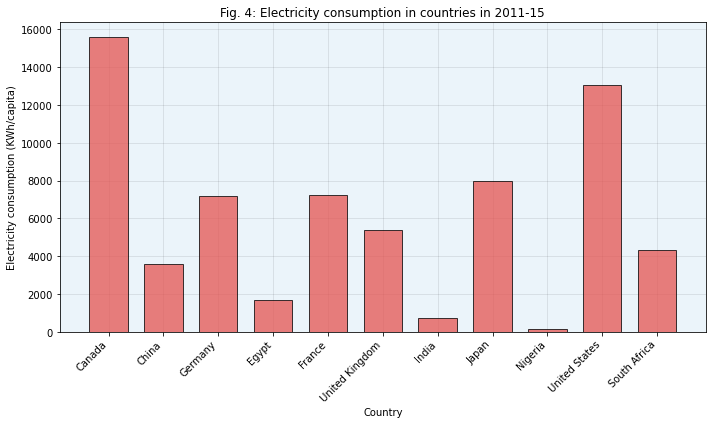

In [27]:
plt.figure(figsize=(10, 6))

ax = plt.axes(facecolor='#EBF4FA')

ax.set_axisbelow(True)

plt.grid(color='black', linestyle='solid', alpha=0.1)

plt.bar(country_proper_names, a['Electricity T&D'], color='#E55451', alpha=0.75, edgecolor='black', width=0.7)

plt.xlabel("Country")
plt.ylabel("Electricity consumption (KWh/capita)")

plt.xticks(rotation=45, ha='right')

plt.title("Fig. 4: Electricity consumption in countries in 2011-15")

plt.tight_layout()
plt.savefig('Energy consumption.png', dpi=720, bbox_inches='tight')
plt.show()

**Per capita electricity usage is very high in Canada and the US.** 

In [28]:
# countries of interest: Canada, China, Germany, France, United Kingdom, Japan, United States, South Africa

In [29]:
# Comparison of energy sources for electricity production


comparison_2 = pd.DataFrame(dataframe_2.loc[:, [('Electricity production source (% of total)','Solar & Wind'), 
                                                ('Electricity production source (% of total)','Nuclear'), 
                                                ('Electricity production source (% of total)','Hydro')]])

comparison_2 = pd.DataFrame(comparison_2).join(pd.DataFrame(dataframe_2.loc[:, 
                                                            [('Electricity production source (% of total)','Fossil fuels')]]))

source = comparison_2.reset_index().droplevel(level=0, axis=1)

source.columns = ['Country', 'Year', 'Solar & Wind', 'Nuclear', 'Hydro', 'Fossil fuel']
mix = source.groupby(by='Country').mean()
mix

,Year,Solar & Wind,Nuclear,Hydro,Fossil fuel
Country,,,,,
CAN,2013.0,4.610572,15.364521,58.330085,21.313638
CHN,2013.0,3.454740,2.045368,17.257304,76.848665
DEU,2013.0,21.335314,15.807071,3.228317,58.223146
EGY,2013.0,0.960185,0.000000,7.883479,91.156335
FRA,2013.0,4.766804,77.208463,10.385388,7.177624
GBR,2013.0,14.405011,19.660594,1.595869,63.655315
IND,2013.0,4.818737,2.898970,11.580491,80.685692
JPN,2013.0,5.331989,2.553903,7.649316,79.925226
NGA,2013.0,0.000000,0.000000,19.140297,80.859703


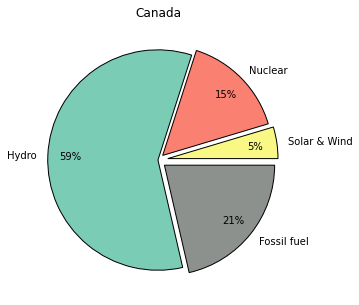

In [30]:
plt.figure(figsize=(5,5))

custom_colors = ['#FAF884', '#FA8072', '#7BCCB5', '#8D918D']

plt.pie(np.array(mix.iloc[0, 1:]), colors=custom_colors, 
        autopct='%1.0f%%', pctdistance=0.8, 
        labels = mix.columns[1:], labeldistance=1.1, 
        explode = (0.09, 0.06, 0, 0.075), wedgeprops={'edgecolor':'black'})

plt.title(country_names[mix.index[0]])

plt.tight_layout()
plt.show()

In [31]:
dct2 = {'CHN':-10, 'JPN':-4, 'DEU':-9, 'GBR':-6, 'USA':-2, 'CAN':-11, 'FRA':-7, 'ZAF':-1}

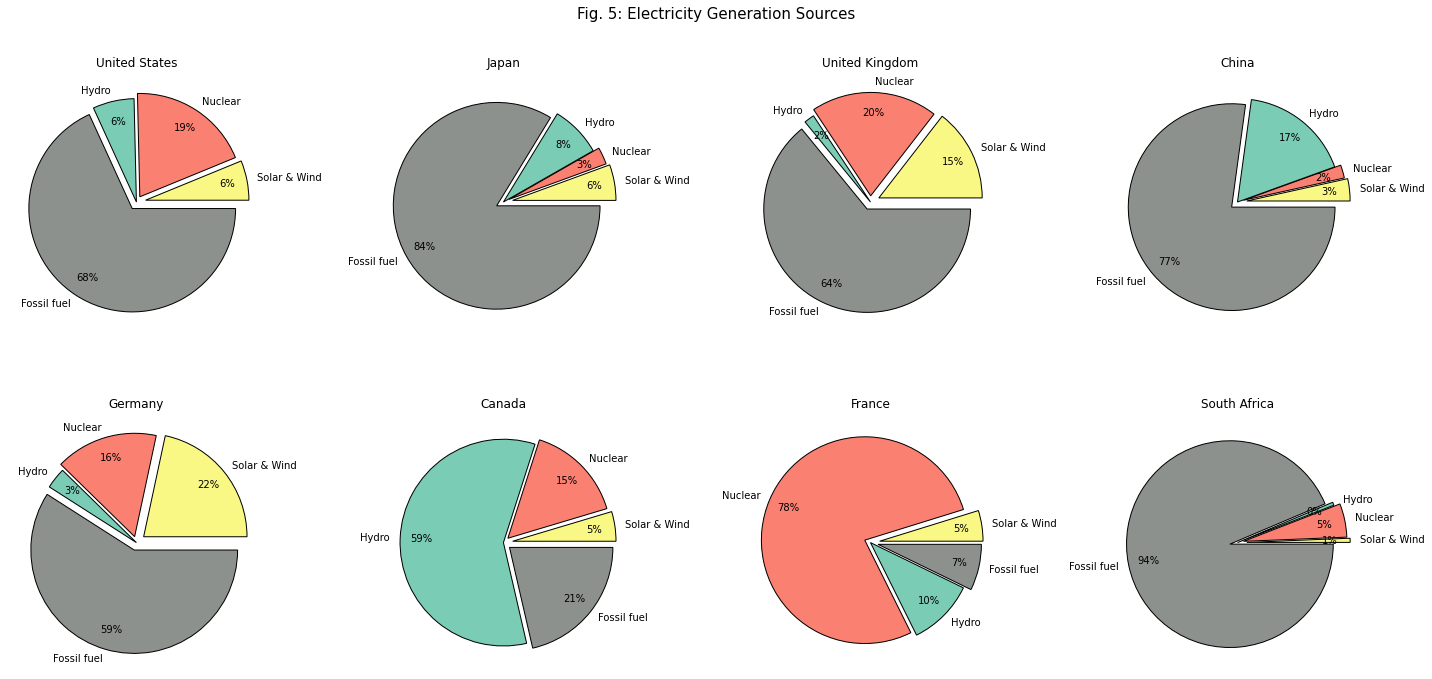

In [32]:
# Subplots of pie-charts to show energy dependency

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

plt.grid(color='black', linestyle='solid', alpha=0.1)

fig.suptitle('Fig. 5: Electricity Generation Sources', fontsize=15)

ix=0
list_idx = [-2, -4, -6, -10, -9, -11, -7, -1]
custom_colors = ['#FAF884', '#FA8072', '#7BCCB5', '#8D918D']
for i in range(2):
    for j in range(4):
        axes[i, j].pie(np.array(mix.iloc[list_idx[ix], 1:]), colors=custom_colors, 
                                autopct='%1.0f%%', pctdistance=0.8, 
                                labels = mix.columns[1:], 
                                labeldistance=1.1, explode = (0.09, 0.06, 0, 0.075), wedgeprops={'edgecolor':'black'})
        
        axes[i, j].set_title(country_names[mix.index[list_idx[ix]]])
        ix += 1
plt.savefig('Energy mix.png', dpi=720, bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()

In [33]:
# Which continents were utilising the most solar and wind?

country_idx_df_2 = dataframe_2.reset_index()

country_idx_df_2 = country_idx_df_2.set_index(['Country'])

# Groupby below using country_groups 

solar_wind = country_idx_df_2.groupby(country_groups)[[('Electricity production source (% of total)','Solar & Wind')]].mean()
solar_wind

,Electricity production source (% of total)
,Solar & Wind
Country,
Africa,0.536075
Asia,4.535155
Europe,13.502376
North America,5.393571


In [34]:
sw = solar_wind.reset_index()
sw[('Electricity production source (% of total)','Solar & Wind')]

sizes = np.array(sw[('Electricity production source (% of total)','Solar & Wind')])*1000

sizes

array([  536.07489104,  4535.1551539 , 13502.3763514 ,  5393.57070787])

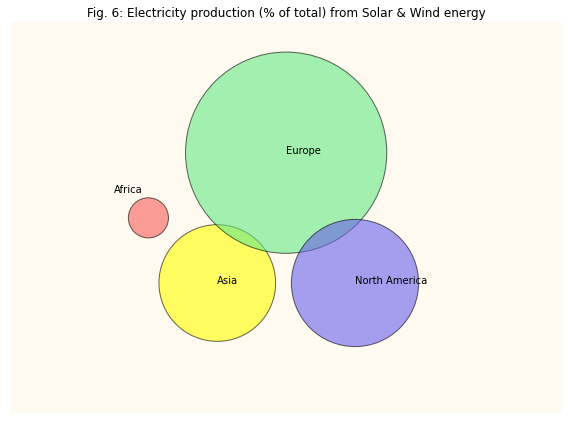

In [35]:
plt.figure(figsize=(8,6), edgecolor='red')

matplotlib.rc('axes', edgecolor=(0, 0, 0, 0), facecolor='#FFFAF0')     # To make the border color white so it's not visible 

plt.scatter([1, 1.5, 2, 2.5], [1.5, 1, 2, 1], s=sizes*3, alpha=0.60, c = ['#F75D59', '#FFFF00', '#64E986', '#6960EC'],
           edgecolors='black')

plt.annotate("Africa", (0.75, 1.70))
plt.annotate("Asia", (1.5, 1))
plt.annotate("Europe", (2, 2))
plt.annotate("North America", (2.5, 1))

plt.xticks([0, 1, 2, 3, 4])
plt.yticks([0, 1, 2, 3])

plt.xticks([])    # removing the ticks so that they're not visible 
plt.yticks([])

plt.title('Fig. 6: Electricity production (% of total) from Solar & Wind energy')

plt.tight_layout()
plt.savefig('Solar_wind.png', dpi=720, bbox_inches='tight', transparent=True)
plt.show()

matplotlib.rcdefaults() #restoring the changes

#plt.style.use('classic')

**Europe has a larger proportion of its electricity production by Solar and Wind energies compared to other continents.**

**The analysis did not find any strong correlation between economic strength and renewable energy usage.** 

In [36]:
# Combine the six plots into one infographics using gridspec, add fig. numbers.

---